In [8]:
import cv2
from matplotlib import pyplot
from keras.models import Model
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.preprocessing.image import img_to_array

# 모델 불러오기
base_model = VGG16(weights='imagenet')
# 모델 확인하기
base_model.summary()

553467096/553467096 ━━━━━━━━━━━━━━━━━━━━ 73s 0us/step


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc1 (Dense)                          │ (None, 4096)                │     102,764,544 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
# Feature Map 추출 모델 생성
model = Model(inputs = base_model.input,outputs = base_model.get_layer('block3_conv3').output)
model.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,735,488 (6.62 MB)

 Trainable params: 1,735,488 (6.62 MB)

 Non-trainable params: 0 (0.00 B)

In [56]:
import matplotlib.pyplot as plt
import cv2
import heapq
from sklearn.metrics.pairwise import cosine_similarity
import glob
from matplotlib import pyplot
import os
from keras.models import Model
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.preprocessing.image import img_to_array
import numpy as np

# 나머지 코드는 그대로 유지


def load_image_paths(folder_path): ## 폴더경로를 줄 경우 해당 폴더 내부의 jpg파일의 경로들 시트를 리턴한다

    # 모든 jpg 파일의 경로를 담을 리스트
  jpg_files_paths = []

  # 폴더 내의 모든 파일 및 하위 폴더 탐색
  for root, dirs, files in os.walk(folder_path):
      for file in files:
          # 파일 확장자가 jpg인 경우에만 추가
          if file.endswith(".jpg"):
              # jpg 파일의 전체 경로 저장
              jpg_files_paths.append(os.path.join(root, file))
    
  return jpg_files_paths # 파일 경로 리스트를 리턴


def load_feature_vectors(jpg_files_paths, model): # 위에서 구한 각 이미지 파일들의 특성벡터들을 저장한다.
   # 각 이미지에 대한 특성 벡터를 저장할 리스트
  feature_vectors = []

  # 이미지 파일들에 대해 반복하여 특성 벡터 추출
  for file_path in jpg_files_paths:
      # 입력 영상 전처리
      image = cv2.imread(file_path)
      image = cv2.resize(image, dsize=(224, 224))
      image = np.expand_dims(image, axis=0)
      image = preprocess_input(image)

      # Feature Map 추출
      feature_map = model.predict(image)

      # 특성 벡터를 리스트에 추가
      feature_vectors.append(feature_map)
  return feature_vectors

def load_feature_vectors_from_folder(folder_path, model):
    # 이미지 파일들의 경로를 불러옴
    jpg_files_paths = load_image_paths(folder_path)
    
    # 특성 벡터를 불러와 반환
    return load_feature_vectors(jpg_files_paths, model)

def visualize_sample_image(sample_image_path):
    if os.path.exists(sample_image_path):
        img = cv2.imread(sample_image_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.imshow(img)
        plt.title('Sample Image')
        plt.axis('off')
        plt.show()
    else:
        print("Sample image not found.")

def extract_feature_map(image_path, model): # 새로운 샘플 파일의 특성 맵을 추출하여 리턴한다.
    # 이미지 불러오기 및 전처리
    img = cv2.imread(image_path)
    img = cv2.resize(img, (224, 224))  # VGG16은 224x224 크기의 이미지를 입력으로 사용
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # OpenCV의 BGR 형식을 RGB로 변환
    img = np.expand_dims(img, axis=0)  # 배치 차원 추가

    # 특성 맵 추출
    feature_map = model.predict(img)
    
    return feature_map

def calculate_top_similar_images(feature_maps, new_feature_map, image_paths, top_n=3):
    similarities = []
    for feature_map, image_path in zip(feature_maps, image_paths):
        similarity = cosine_similarity(feature_map.reshape(1, -1), new_feature_map.reshape(1, -1)) # 2차원 배열로 변
        similarities.append((similarity[0][0], image_path))
    
    # 상위 유사도 순으로 정렬하여 상위 N개의 이미지 반환
    top_n_similar_images = sorted(similarities, key=lambda x: x[0], reverse=True)[:top_n]
    return top_n_similar_images

def visualize_similar_images_with_sample(sample_image_path, image_paths, top_n_similar_images):
    plt.figure(figsize=(10, 5))
    
    # 샘플 이미지 출력
    plt.subplot(1, len(top_n_similar_images) + 1, 1)
    sample_img = cv2.imread(sample_image_path)
    sample_img = cv2.cvtColor(sample_img, cv2.COLOR_BGR2RGB)
    plt.imshow(sample_img)
    plt.title('Sample Image')
    plt.axis('off')
    
    # 유사한 이미지 출력
    for i, (similarity, image_path) in enumerate(top_n_similar_images):
        plt.subplot(1, len(top_n_similar_images) + 1, i + 2)
        img = cv2.imread(image_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.imshow(img)
        plt.title(f'Similarity: {similarity:.2f}')
        plt.axis('off')

    plt.show()

def get_image_paths(folder_path):
    image_paths = []
    # 지정된 폴더 내의 모든 이미지 파일들의 경로를 찾아냄
    for file_path in glob.glob(os.path.join(folder_path, "*.jpg")):
        image_paths.append(file_path)
    return image_pathsimage_paths


def find_and_visualize_similar_images(sample_image_path, precalculated_feature_maps, folder_path, model):
    # 기존 이미지들의 특성 맵을 사용하기 때문에 이미지 파일들의 경로는 필요하지 않음
    
    # 샘플 이미지의 특성 맵 추출
    new_feature_map = extract_feature_map(sample_image_path, model)

    image_paths = get_image_paths(folder_path)
    
    # 샘플 이미지와 기존 이미지들 간의 코사인 유사도 계산하고 상위 3개 반환
    top_n_similar_images = calculate_top_similar_images(precalculated_feature_maps, new_feature_map, image_paths)

  
    # 유사한 이미지 시각화
    visualize_similar_images_with_sample(sample_image_path, image_paths, top_n_similar_images)

In [86]:
import os

folder_path = "C:\\Temp\\hyanghae\\NOT_FAMOUCE_PLACE_JPG"

# 지정된 폴더 안의 파일 목록을 가져옵니다.
file_names = os.listdir(folder_path)

# 파일명을 3자리 숫자 형식으로 변경하여 새로운 파일명 리스트를 생성합니다.
new_file_names = [f"{i:03d}.jpg" for i in range(len(file_names))]

# 폴더 내의 모든 파일명을 변경합니다.
for old_name, new_name in zip(file_names, new_file_names):
    old_path = os.path.join(folder_path, old_name)
    new_path = os.path.join(folder_path, new_name)
    os.rename(old_path, new_path)

print("파일명이 변경되었습니다.")

파일명이 변경되었습니다.


In [87]:
folder_path = "C:\\Temp\\hyanghae\\NOT_FAMOUCE_PLACE_JPG"
feature_maps = load_feature_vectors_from_folder(folder_path, model)
print(len(feature_maps))


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 651ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

In [30]:
import cv2
from matplotlib import pyplot
from keras.models import Model
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.preprocessing.image import img_to_array
from keras.models import model_from_json

# 모델 불러오기
base_model = VGG16(weights='imagenet')
# 모델 확인하기

image_model = Model(inputs = base_model.input,outputs = base_model.get_layer('block3_conv3').output)


# 모델 아키텍처를 JSON으로 저장
model_json = image_model.to_json()
with open("C:/Temp/hyanghae/model_architecture.json", "w") as json_file:
    json_file.write(model_json)

# 모델 가중치를 저장
image_model.save_weights("C:/Temp/hyanghae/model_weights.weights.h5")


In [33]:
from keras.models import model_from_json

# 모델 아키텍처를 불러오기
with open("C:/Temp/hyanghae/model_architecture.json", "r") as json_file:
    loaded_model_json = json_file.read()

# 불러온 모델 아키텍처로 모델 구성하기
loaded_model = model_from_json(loaded_model_json)

# 저장된 가중치를 불러오기
loaded_model.load_weights("C:/Temp/hyanghae/model_weights.weights.h5")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


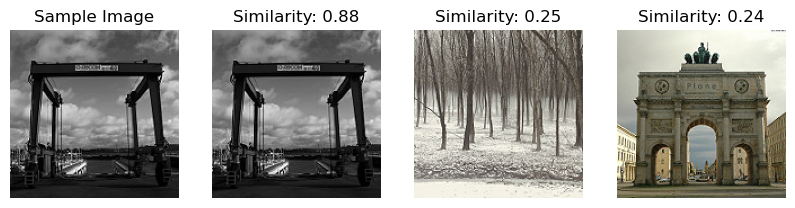

In [42]:
sample_path = r"C:\Temp\hyanghae\scene_images\1.jpg"
folder_path = r"C:\Temp\hyanghae\NOT_FAMOUCE_PLACE_JPG"

find_and_visualize_similar_images(sample_path, feature_maps,folder_path, loaded_model)

In [67]:
print(len(feature_maps))
del feature_maps[-2:]
print(len(feature_maps))

742
740


In [63]:
# CSV 파일에서 데이터 로드
df = pd.read_csv(r"C:\Temp\hyanghae\NOT_FAMOUS_PLACE_updated.csv")

# 중복된 값을 가진 행 삭제
df.drop_duplicates(subset="TOURIST_SPOT_NAME", keep="first", inplace=True)

# 중복 제거 후 데이터프레임 확인
print("중복된 값을 가진 행이 삭제되었습니다.")
print(len(df))

중복된 값을 가진 행이 삭제되었습니다.
740


In [88]:


# IMAGE_PATH 컬럼 생성 및 값 할당
df["IMAGE_PATH"] = [f"C:\\Temp\\hyanghae\\NOT_FAMOUCE_PLACE_JPG\\{index:03d}.jpg" for index in range(len(df))]

# 수정된 데이터프레임을 CSV 파일로 저장
df.to_csv(r"C:\Temp\hyanghae\NOT_FAMOUS_PLACE_updated.csv", index=False)

# 저장된 CSV 파일 확인
print("CSV 파일이 성공적으로 저장되었습니다.")

CSV 파일이 성공적으로 저장되었습니다.


In [89]:
# CSV 파일에서 데이터 로드
df = pd.read_csv(r"C:\Temp\hyanghae\NOT_FAMOUS_PLACE_updated.csv")

# 데이터 이름과 특성 벡터를 함께 관리하는 딕셔너리 생성
feature_maps_with_names = {}


# 특성 벡터의 개수를 확인하고 특성 벡터와 데이터의 이름을 딕셔너리에 추가
for i in range(len(feature_maps)):
    feature_vector = feature_maps[i]
    data_name = df["TOURIST_SPOT_NAME"].iloc[i]  # 데이터의 이름은 CSV 파일의 이름 열에서 가져옴
    feature_maps_with_names[data_name] = feature_vector

print(len(feature_maps_with_names))

# 딕셔너리에서 특성 벡터와 데이터의 이름 확인하면서 데이터프레임의 이름과 다른 경우 인덱스 출력
for idx, data_name in enumerate(feature_maps_with_names.keys()):
    if data_name != df["TOURIST_SPOT_NAME"].iloc[idx]:
        print("Index {} - Data name '{}' does not match with '{}' in the DataFrame.".format(idx, data_name, df["TOURIST_SPOT_NAME"].iloc[idx]))


740


In [91]:
first_value = list(feature_maps_with_names.keys())[0:100]
print(first_value)


['중앙시장', 'CGV동두천', '동두천큰시장', '양키시장', '영재파3골프랜드', '강천보한강문화관', '신륵사관광지', '은아목장', '연천당포성', '연천파크골프장', '고대산자연휴양림', '한탄강관광지', '연천경순왕릉', '신탄리역', '동막골유황천', '열쇠전망대', 'K26잠수풀', '상천역', '산장관광지', '청심평화월드센터', '가평사계절썰매장', '음악역1939', '현등사', '청평자연휴양림', '이탈리아마을 피노키오와다빈치', '가평파크골프장', '칼봉산자연휴양림', '가평별빛공원', '강씨봉자연휴양림', '워터플레이', '미리내힐빙클럽', '양평들꽃수목원', '양평곤충박물관', '중미산천문대', '지평역', '양평백운봉자연휴양림', '갈월사', '중원계곡', '강상체육공원', '양평군립미술관', '서후리숲', '설매재자연휴양림', '파머스가든봄', '개군레포츠공원', '양평어린이건강놀이터', '영진해변', '허난설헌생가터', '강릉오죽한옥마을', '원더스카이', '안인항', '강릉아트센터', '옥계해변', '강릉하키센터', '연곡해변', '금진해변', '순긋해변', '쌍둥이동물농장', 'CGV강릉', '강릉항여객터미널', '샌드파인GC', '아라나비강릉항점', '참소리축음기에디슨과학박물관', '강남축구공원', '강릉스피드스케이팅경기장', '강릉경찰수련원', '정동진조각공원', '강릉컬링센터', '월화거리', 'BTS버스정류장', '한국여성수련원', '와우안반데기', '강릉농산물도매시장', '북평민속시장', '묵호역', '롯데시네마동해', '동쪽바다중앙시장', '추암출렁다리', '파인밸리CC', '블랙밸리CC', '대금굴', '죽서루', '새천년해안도로', '가곡유황온천', '덕풍계곡', '덕봉산해안생태탐방로', '이사부사자공원', '설악항활어판매센터', '국립산악박물관', '설악산자생식물원', '속초등대전망대', '메가박스속초', '청초호유원지', '아바이마을갯배청호동선착장', '365세이프타운', '태백시외버스터미널', '태백산눈

In [93]:
import gzip
import pickle
import os

# 저장할 디렉토리 경로
output_directory = r"C:\Temp\hyanghae\split_feature_maps"
os.makedirs(output_directory, exist_ok=True)

# 분할할 크기 (예: 10000개씩)
split_size = 50

# feature_maps_with_names를 split_size만큼씩 분할하여 파일로 저장
for idx, chunk in enumerate([list(feature_maps_with_names.items())[i:i+split_size] for i in range(0, len(feature_maps_with_names), split_size)]):
    file_path = os.path.join(output_directory, f"feature_maps_chunk_{idx:02d}.gz")
    with gzip.open(file_path, 'wb') as f:
        pickle.dump(dict(chunk), f)
